<h1 align="center"> Лабораторная работа №5 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 15 ноября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [16]:
!pip install numpy networkx scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

# Задание 1. Кластеризация социальной сети

**Количество вершин графа:**

In [18]:
n = 30

**Сгенерируем связный граф:**

In [41]:
G = nx.random_geometric_graph(n, 0.25)

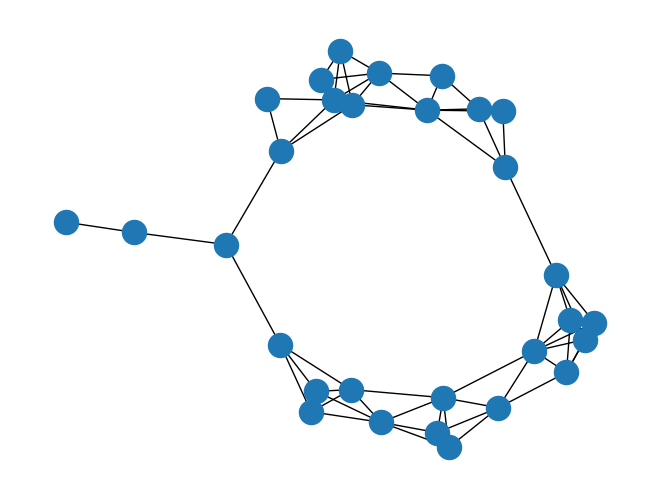

In [46]:
nx.draw(G, pos = nx.drawing.spring_layout(G))

**Матрица Лапласа для этого графа:**

In [47]:
laplace_matrix = np.matrix(nx.laplacian_matrix(G).toarray())

**Собственные числа и соответствующие им собственные вектора:**

In [48]:
eigen_values, eigen_vectors = np.linalg.eig(laplace_matrix)
idx = eigen_values.argsort()
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx].transpose()

**Число компонент кластеризации графа:**

In [49]:
k = 3

**Матрица из k собственных векторов, соответствующих самым маленьким собственным числам:**

In [50]:
v = np.column_stack([np.asarray(eigen_vectors[i])[0] for i in range(k)])
v.shape

(30, 3)

**Применим метод k-means для кластеризации**

In [51]:
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(v)

KMeans(n_clusters=3)

**Раскрасим исходный граф:**

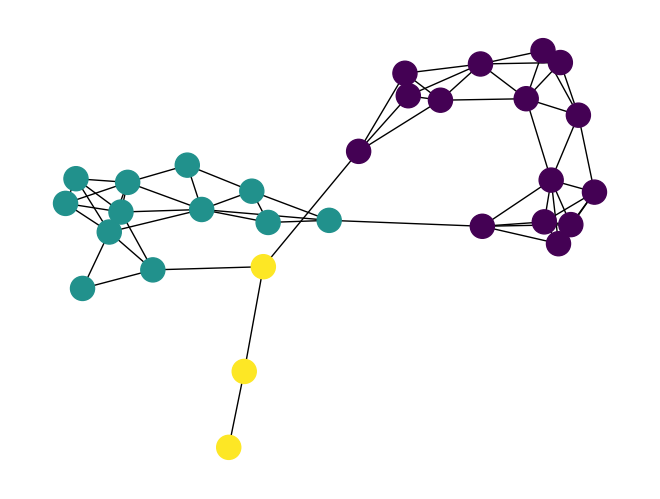

In [52]:
nx.draw(G, pos = nx.drawing.spring_layout(G), node_color = kmeans.labels_)

**Почему это работает?**

Среди собственных векторов есть один особо важный — это вектор Фидлера, или, если говорить без специальной терминологии, второй собственный вектор с минимальным собственным значением, если не учитывать нулевое. Матрица Лапласа, которая также известна как матрица Кирхгофа, используется для анализа структуры графа. Вектор Фидлера позволяет разделить граф на два кластера: вершины с положительными значениями в этом векторе относятся к одному кластеру, а с отрицательными — к другому. Этот подход можно расширить: второй собственный вектор работает относительно первого, как вектор Фидлера, третий — относительно второго и так далее, что позволяет разбивать граф на три и более кластера. Метод k-средних тоже способен выявлять такие внутренние связи между точками и делить их на кластеры, работая не только с 1D, 2D и 3D данными, но и с данными из многомерных пространств, которые сложно визуализировать!